## Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


### IMDB Dataset

In [2]:
data = pd.read_csv("dataset/imdb_dataset.csv")

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
data.shape

(50000, 2)

In [5]:
data["sentiment"].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
print("Review :\n"+data['review'][0])
print("Sentiment :\n"+data['sentiment'][0])

Review :
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [7]:
print("Review :\n"+data['review'][3])
print("Sentiment :\n"+data['sentiment'][3])

Review :
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
Sentiment :
negative


<function matplotlib.pyplot.show(close=None, block=None)>

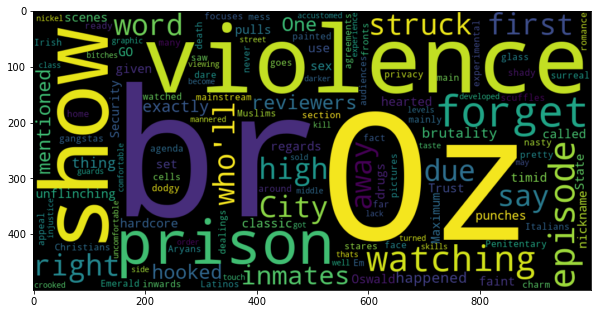

In [8]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=data['review'][0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

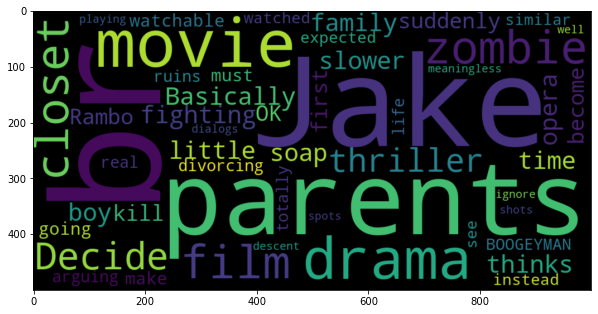

In [9]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=data['review'][3]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

## Data Extraction and Pre-processing

### Removal of HTML Tags and Noise Text

In [10]:
def removeHTMLtags(txt):
    return BeautifulSoup(txt, "html.parser").get_text()

data['review']=data['review'].apply(removeHTMLtags)

In [11]:
# #Text between Square Brackets present??
# for i in range(len(data)):
#     match = re.match('\[[^]]*\]', data["review"][i])
#     if match:
#         print(i,data["review"][i],"\n\n")

In [12]:
def removeSquareBrackets(text):
    return re.sub('\[[^]]*\]', '', text)
data['review']=data['review'].apply(removeSquareBrackets)

In [13]:
def removeSpecialChar(text):
    return re.sub('[^a-zA-z0-9\s]|[_]','',text)

data['review']=data['review'].apply(removeSpecialChar)

In [14]:
print("Updated Review :\n"+data['review'][0])

Updated Review :
One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forg

In [15]:
print("Updated Review :\n"+data['review'][3])

Updated Review :
Basically theres a family where a little boy Jake thinks theres a zombie in his closet  his parents are fighting all the timeThis movie is slower than a soap opera and suddenly Jake decides to become Rambo and kill the zombieOK first of all when youre going to make a film you must Decide if its a thriller or a drama As a drama the movie is watchable Parents are divorcing  arguing like in real life And then we have Jake with his closet which totally ruins all the film I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents  descent dialogs As for the shots with Jake just ignore them


### Text Normalization using Stemming

In [16]:
def stemming(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

data['review']=data['review'].apply(stemming)

### Tokenization and removal of stopwords

In [17]:
stp_list=nltk.corpus.stopwords.words('english')
stp_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
tokenizer=ToktokTokenizer()

def removeStopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    updatedTokens = []
    for token in tokens: 
        if token.lower() not in stp_list:
            updatedTokens.append(token)
    return ' '.join(updatedTokens)   

data['review']=data['review'].apply(removeStopwords)

<function matplotlib.pyplot.show(close=None, block=None)>

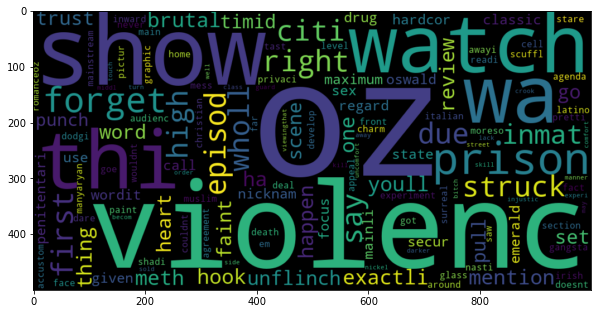

In [19]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=data['review'][0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

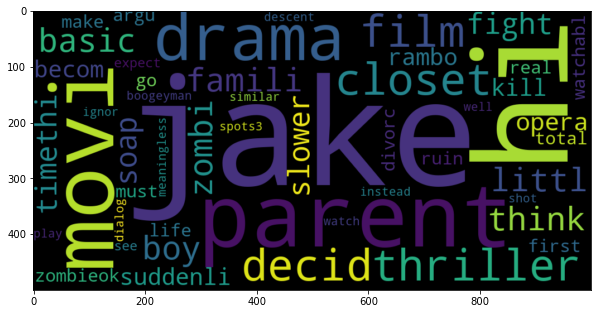

In [20]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=data['review'][3]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

#### Encoding positive as 1 and negative as 0

In [21]:
le = preprocessing.LabelEncoder()
data['sentiment'] = le.fit_transform(data['sentiment'])
data['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

## Splitting data into Training and Testing data

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.review,data.sentiment,train_size = 0.9)

## Feature Extraction using TF-IDF

In [23]:
vect=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

training_data=vect.fit_transform(X_train)
testing_data=vect.transform(X_test)

In [24]:
print(training_data.shape)
print(testing_data.shape)

(45000, 6866566)
(5000, 6866566)


# Applying Various Algorithms for Sentiment Analysis

In [25]:
ml_algos = pd.DataFrame(columns=['Accuracy','F1-Score'], 
                        index=['KNeighborsClassifier', 'BernoulliNB', 'MultinomialNB','Logistic Regression', 'Linear SVC'])


# Bernoulli Naive Bayes

## Training and Building the Model for classification

In [26]:
bnb = BernoulliNB()
bnb.fit(training_data,y_train)

BernoulliNB()

In [27]:
predicted_data = bnb.predict(testing_data)
print(predicted_data)

[0 0 0 ... 0 0 0]


In [28]:
print(y_test)

21228    0
13828    0
10446    0
27206    0
25084    0
        ..
11445    0
23028    0
34324    0
24351    0
41836    0
Name: sentiment, Length: 5000, dtype: int32


## Testing and Evaluating the model 

In [29]:
bnb.score(testing_data,y_test)

0.5634

In [30]:
ml_algos.loc['BernoulliNB']['Accuracy'] = accuracy_score(y_test,predicted_data)
ml_algos.loc['BernoulliNB']['F1-Score'] = f1_score(y_test,predicted_data)
accuracy_score(y_test,predicted_data)

0.5634

In [31]:
print(classification_report(y_test,predicted_data,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.54      1.00      0.70      2562
    Negative       0.96      0.11      0.20      2438

    accuracy                           0.56      5000
   macro avg       0.75      0.55      0.45      5000
weighted avg       0.74      0.56      0.45      5000



# Multinomial Naive Bayes

## Training and Building the Model for classification

In [32]:
mnb = MultinomialNB()
mnb.fit(training_data,y_train)

MultinomialNB()

In [33]:
predicted_data = mnb.predict(testing_data)
print(predicted_data)

[0 0 0 ... 0 0 0]


In [34]:
print(y_test)

21228    0
13828    0
10446    0
27206    0
25084    0
        ..
11445    0
23028    0
34324    0
24351    0
41836    0
Name: sentiment, Length: 5000, dtype: int32


## Testing and Evaluating the model 

In [35]:
mnb.score(testing_data,y_test)

0.7498

In [36]:
ml_algos.loc['MultinomialNB']['Accuracy'] = accuracy_score(y_test,predicted_data)
ml_algos.loc['MultinomialNB']['F1-Score'] = f1_score(y_test,predicted_data)
accuracy_score(y_test,predicted_data)

0.7498

In [37]:
print(classification_report(y_test,predicted_data,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.77      0.73      0.75      2562
    Negative       0.73      0.77      0.75      2438

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000



# Logistic Regression

## Training and Building the Model for classification

In [38]:
lr = LogisticRegression()
lr.fit(training_data,y_train)

LogisticRegression()

In [39]:
predicted_data = lr.predict(testing_data)
print(predicted_data)

[0 0 0 ... 0 0 0]


In [40]:
print(y_test)

21228    0
13828    0
10446    0
27206    0
25084    0
        ..
11445    0
23028    0
34324    0
24351    0
41836    0
Name: sentiment, Length: 5000, dtype: int32


## Testing and Evaluating the model 

In [41]:
lr.score(testing_data,y_test)

0.7472

In [42]:
ml_algos.loc['Logistic Regression']['Accuracy'] = accuracy_score(y_test,predicted_data)
ml_algos.loc['Logistic Regression']['F1-Score'] = f1_score(y_test,predicted_data)
accuracy_score(y_test,predicted_data)

0.7472

In [43]:
print(classification_report(y_test,predicted_data,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.78      0.71      0.74      2562
    Negative       0.72      0.79      0.75      2438

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000



# Linear Support Vector Classifier

## Training and Building the Model for classification

In [44]:
svc = LinearSVC()
svc.fit(training_data,y_train)

LinearSVC()

In [45]:
predicted_data = svc.predict(testing_data)
print(predicted_data)

[0 0 0 ... 0 0 0]


In [46]:
print(y_test)

21228    0
13828    0
10446    0
27206    0
25084    0
        ..
11445    0
23028    0
34324    0
24351    0
41836    0
Name: sentiment, Length: 5000, dtype: int32


## Testing and Evaluating the model 

In [47]:
svc.score(testing_data,y_test)

0.7484

In [48]:
ml_algos.loc['Linear SVC']['Accuracy'] = accuracy_score(y_test,predicted_data)
ml_algos.loc['Linear SVC']['F1-Score'] = f1_score(y_test,predicted_data)
accuracy_score(y_test,predicted_data)

0.7484

In [49]:
print(classification_report(y_test,predicted_data,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.76      2562
    Negative       0.75      0.73      0.74      2438

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000



# K Neighbors Classifier

## Training and Building the Model for classification

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knc = KNeighborsClassifier()
knc.fit(training_data,y_train)

KNeighborsClassifier()

In [52]:
predicted_data = knc.predict(testing_data)
print(predicted_data)

[0 0 0 ... 0 1 0]


In [53]:
print(y_test)

21228    0
13828    0
10446    0
27206    0
25084    0
        ..
11445    0
23028    0
34324    0
24351    0
41836    0
Name: sentiment, Length: 5000, dtype: int32


## Testing and Evaluating the model 

In [54]:
knc.score(testing_data,y_test)

0.512

In [55]:
ml_algos.loc['KNeighborsClassifier']['Accuracy'] = accuracy_score(y_test,predicted_data)
ml_algos.loc['KNeighborsClassifier']['F1-Score'] = f1_score(y_test,predicted_data)
accuracy_score(y_test,predicted_data)

0.512

In [56]:
print(classification_report(y_test,predicted_data,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.51      0.86      0.64      2562
    Negative       0.50      0.15      0.23      2438

    accuracy                           0.51      5000
   macro avg       0.51      0.50      0.43      5000
weighted avg       0.51      0.51      0.44      5000



# Comparision of the different algortihms

In [57]:
ml_algos.sort_values(by="Accuracy", ascending=False)

,Accuracy,F1-Score
MultinomialNB,0.7498,0.751045
Linear SVC,0.7484,0.739652
Logistic Regression,0.7472,0.752739
BernoulliNB,0.5634,0.19654
KNeighborsClassifier,0.512,0.226379


## By Accuracy

<AxesSubplot:>

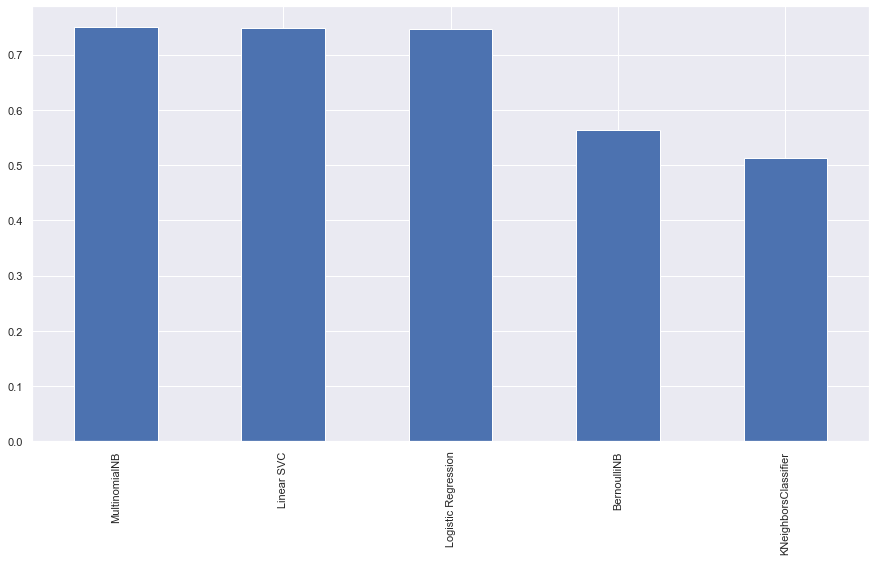

In [58]:
sns.set(rc={'figure.figsize':(15,8)})
ml_algos.sort_values(by="Accuracy", ascending=False).Accuracy.plot(kind="bar")

## By F1-Score

<AxesSubplot:>

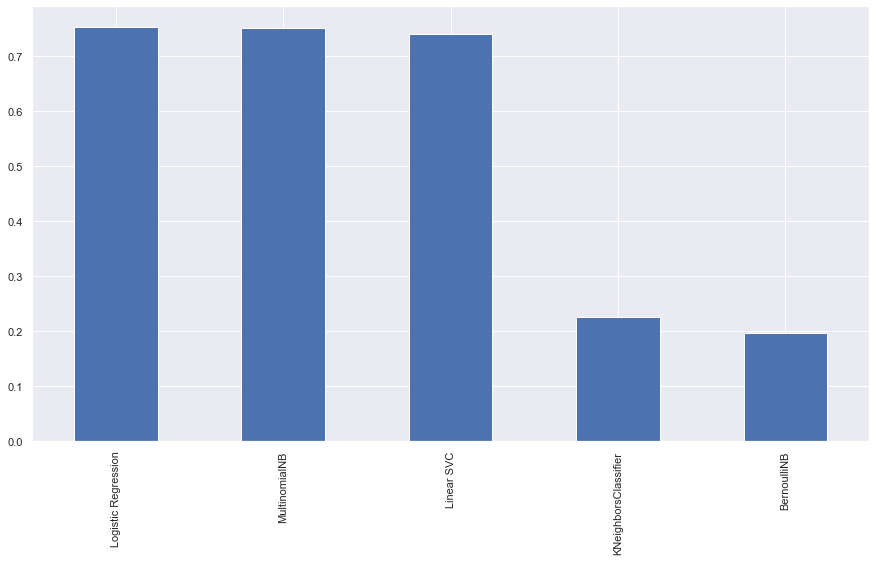

In [59]:
sns.set(rc={'figure.figsize':(15,8)})
ml_algos.sort_values(by="F1-Score", ascending=False)["F1-Score"].plot(kind="bar")